In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

In [59]:
df = pd.read_csv(fr"survey_lung_cancerdata.csv")
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})
df['GENDER'] = df['GENDER'].replace({'M': 2, 'F': 1})
display(df[['SMOKING','LUNG_CANCER']])
df.corr()['LUNG_CANCER']

,SMOKING,LUNG_CANCER
0,1,1
1,2,1
2,1,0
3,2,0
4,1,0
...,...,...
304,1,1
305,2,1
306,2,1
307,2,1


GENDER                   0.067254
AGE                      0.089465
SMOKING                  0.058179
YELLOW_FINGERS           0.181339
ANXIETY                  0.144947
PEER_PRESSURE            0.186388
CHRONIC_DISEASE          0.110891
FATIGUE                  0.150673
ALLERGY                  0.327766
WHEEZING                 0.249300
ALCOHOL_CONSUMING        0.288533
COUGHING                 0.248570
SHORTNESS OF BREATH      0.060738
SWALLOWING_DIFFICULTY    0.259730
CHEST_PAIN               0.190451
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

In [61]:
x = df[["AGE", 'PEER_PRESSURE', 'ALLERGY', 'ALCOHOL_CONSUMING', 'COUGHING','SWALLOWING_DIFFICULTY']]
y = df["LUNG_CANCER"]
sm.add_constant(x)
logit = Logit(y,x).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.272581
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  309
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.2810
Time:                        15:19:34   Log-Likelihood:                -84.228
converged:                       True   LL-Null:                       -117.15
Covariance Type:            nonrobust   LLR p-value:                 7.488e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AGE                      -0.0906      0.019     -4.792      0.000      -0.128      -0.

In [95]:
predikce = logit.predict(x)
bool_predikce = []

#>> zmena na true/false
#@ threshold
threshold = 0.75
for p in predikce:
    if p > threshold:
        p = True
    else:
        p = False
    bool_predikce.append(p)

#>> confusion matrix
tp = tn = fp = fn = 0
for i in range(0,len(predikce)):
    if bool_predikce[i] and y[i]:
        tp += 1
    elif not bool_predikce[i] and not y[i]:
        tn += 1
    elif bool_predikce[i] and not y[i]:
        fp += 1
    elif not bool_predikce[i] and y[i]:
        fn += 1
pd.DataFrame([[tp, fp],
                [tn, fn]],
                index = ["Actualy Positive", "Actualy Negative"], columns=["Predicted Positive", "Predicted Negative"])


,Predicted Positive,Predicted Negative
Actualy Positive,251,18
Actualy Negative,21,19


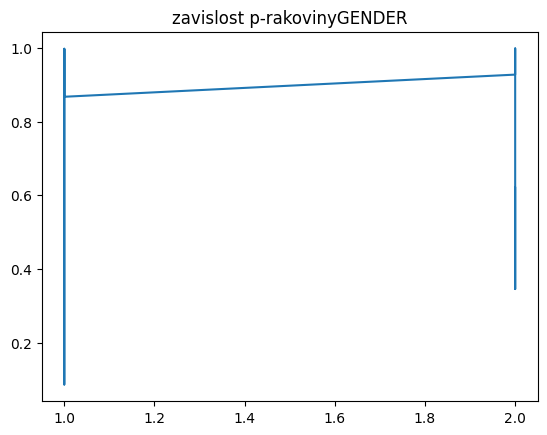

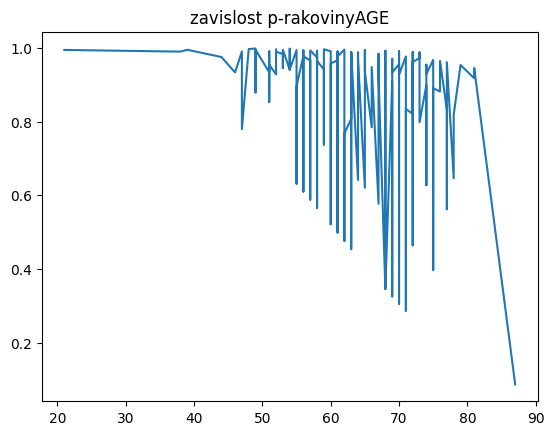

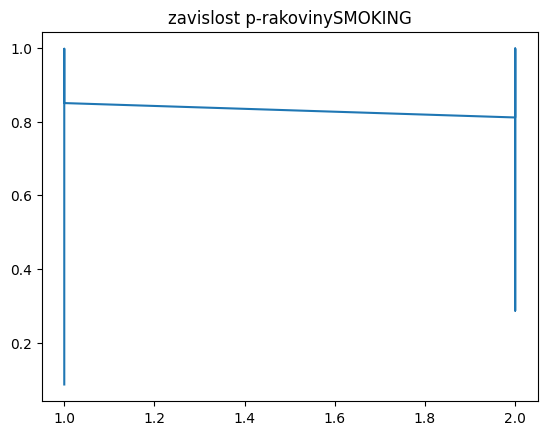

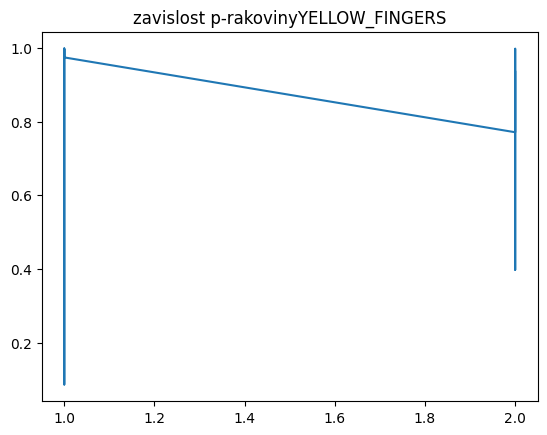

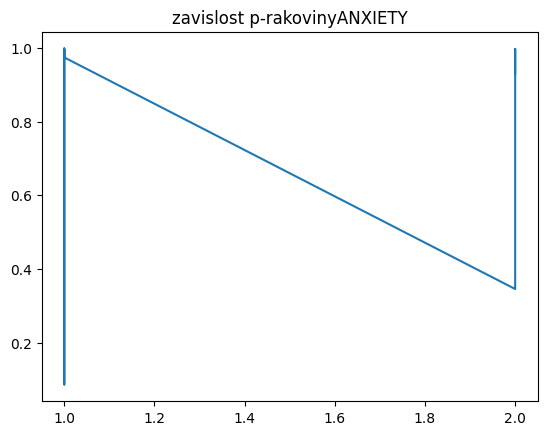

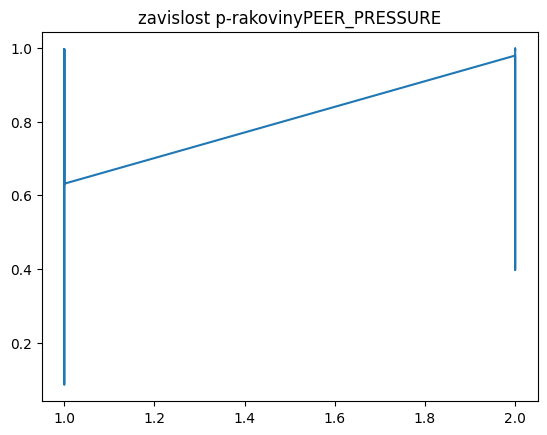

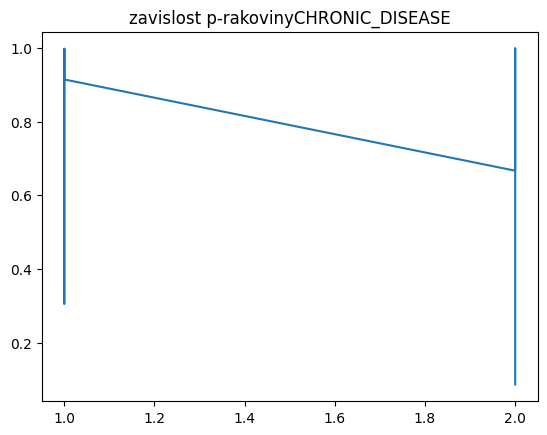

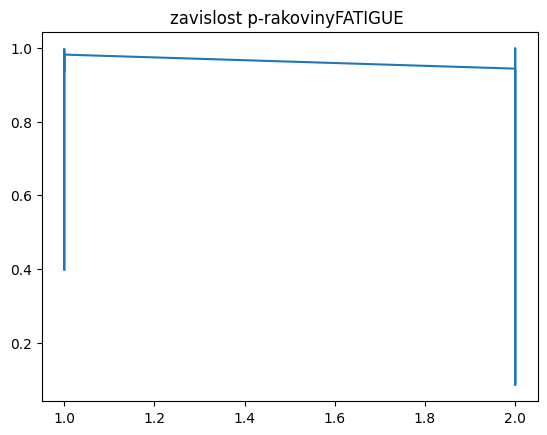

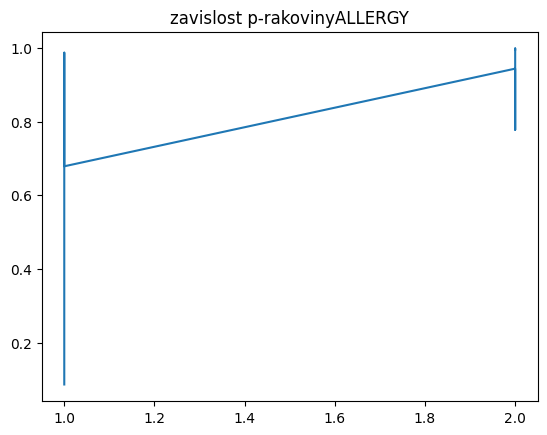

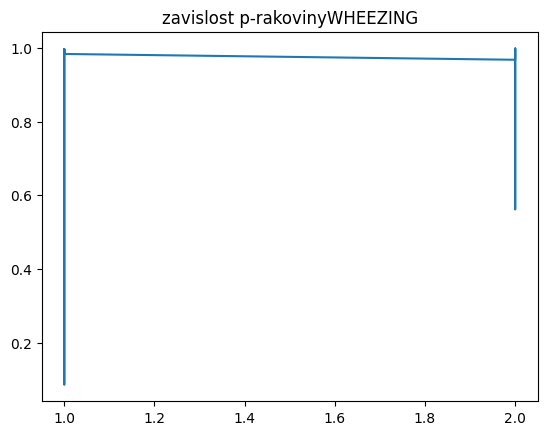

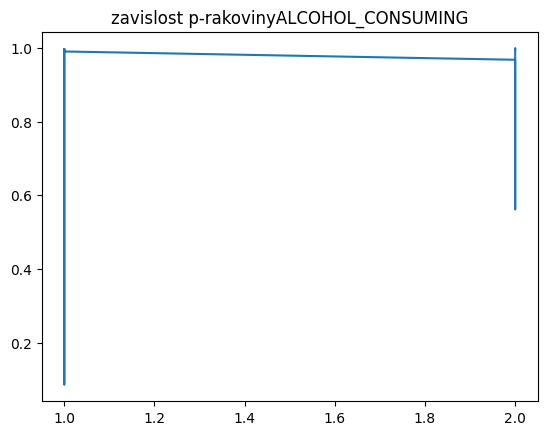

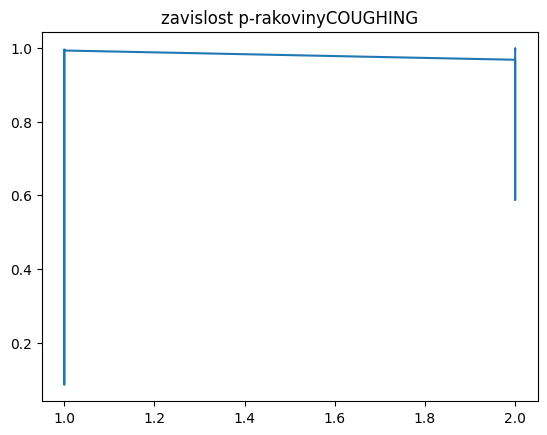

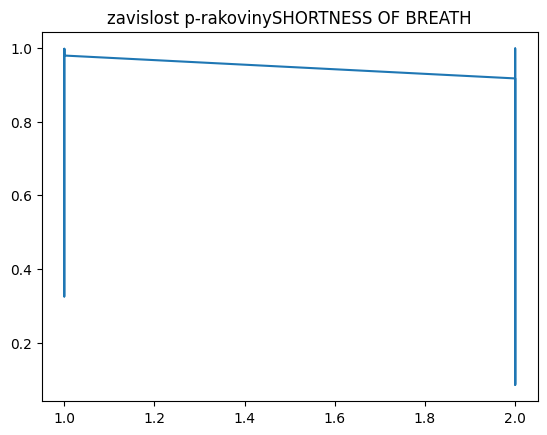

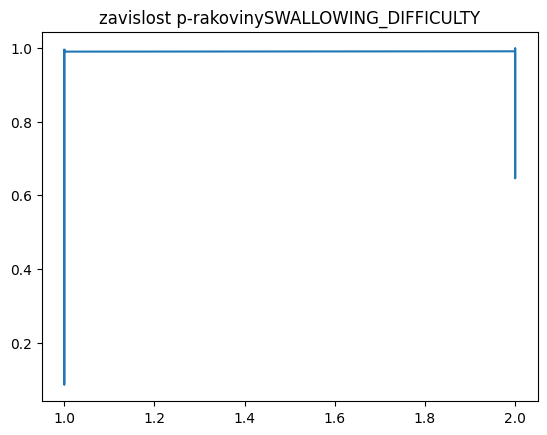

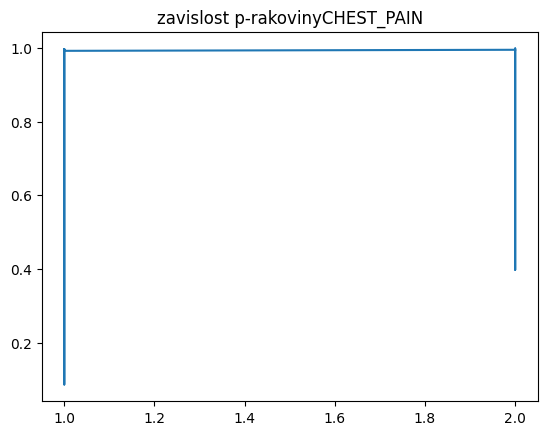

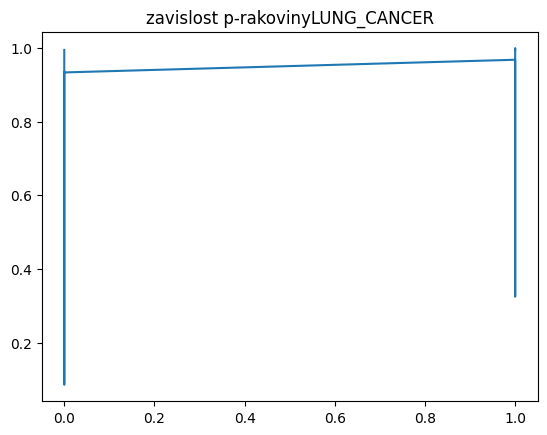

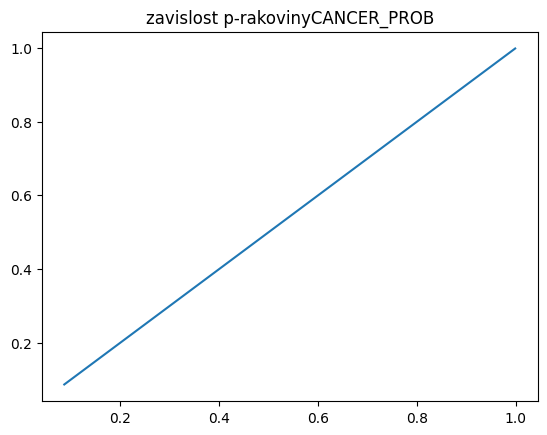

: 

In [118]:
from matplotlib import pyplot as plt
#>> graf
#!! vubec nmetusim co s tim
for var in df.columns:
    df['CANCER_PROB'] = predikce
    df_sorted = df.sort_values(by=var)
    plt.title(f"zavislost p-rakoviny{var}")
    plt.plot(df_sorted[var], df_sorted['CANCER_PROB'])
    plt.show()